In [182]:
import numpy as np
import matplotlib.pyplot as plt

# import time
import torch
import torch.optim as optim
import torch.nn.functional as F
from argparse import ArgumentParser
from torch.distributions import MultivariateNormal

from nf.TNF import *
from nf.models import NormalizingFlowModel

from tensorboardX import SummaryWriter

from shapely.geometry import Point, Polygon
from matplotlib.animation import FuncAnimation

In [183]:
# Define fixed colormap
myCmap = plt.cm.viridis  
cmap_norm = plt.Normalize(vmin=-1, vmax=1)  # Define the range of the colormap

In [184]:
def plot_data(samples, isColor=False, size=1.5, **kwargs):

    if isColor:
        x = samples[:, 0]
        y = samples[:, 1]
        colors = samples[:, 2]    
        plt.scatter(x, y, c=colors, cmap=myCmap, alpha=0.5, s=size, norm=cmap_norm)
        plt.colorbar(label='alpha')
        plt.xlabel('x')
        plt.ylabel('y')

    else:
        plt.scatter(samples[:, 0], samples[:, 1], s=1, marker="o", **kwargs)    
        plt.xlabel("x")
        plt.ylabel("y")

# read the hull points from file
with open('hull_points.txt', 'r') as f:
    lines = f.readlines()
    cell_coords = np.zeros((len(lines), 2))
    for i in range(len(lines)):
        line = lines[i].split('\t')
        cell_coords[i,0] = float(line[0])
        cell_coords[i,1] = float(line[1])

# print(cell_coords)
# close the polygon
cell_coords_closed = np.append(cell_coords, [cell_coords[0]], axis=0)
        
cutoff = 20
numchosen = 89
datapoints = np.zeros((cutoff*numchosen,4))
# read from file the first, second, and fourth columns
with open('new_traj_frame_wise.txt', 'r') as f:
    for i in range(cutoff*numchosen):
        line = f.readline()
        line = line.split('\t')
        datapoints[i,0] = float(line[0])
        datapoints[i,1] = float(line[1])
        datapoints[i,2] = float(line[2])
        datapoints[i,3] = float(line[3])

print('shape of datapoints', datapoints.shape)

shape of datapoints (1780, 4)


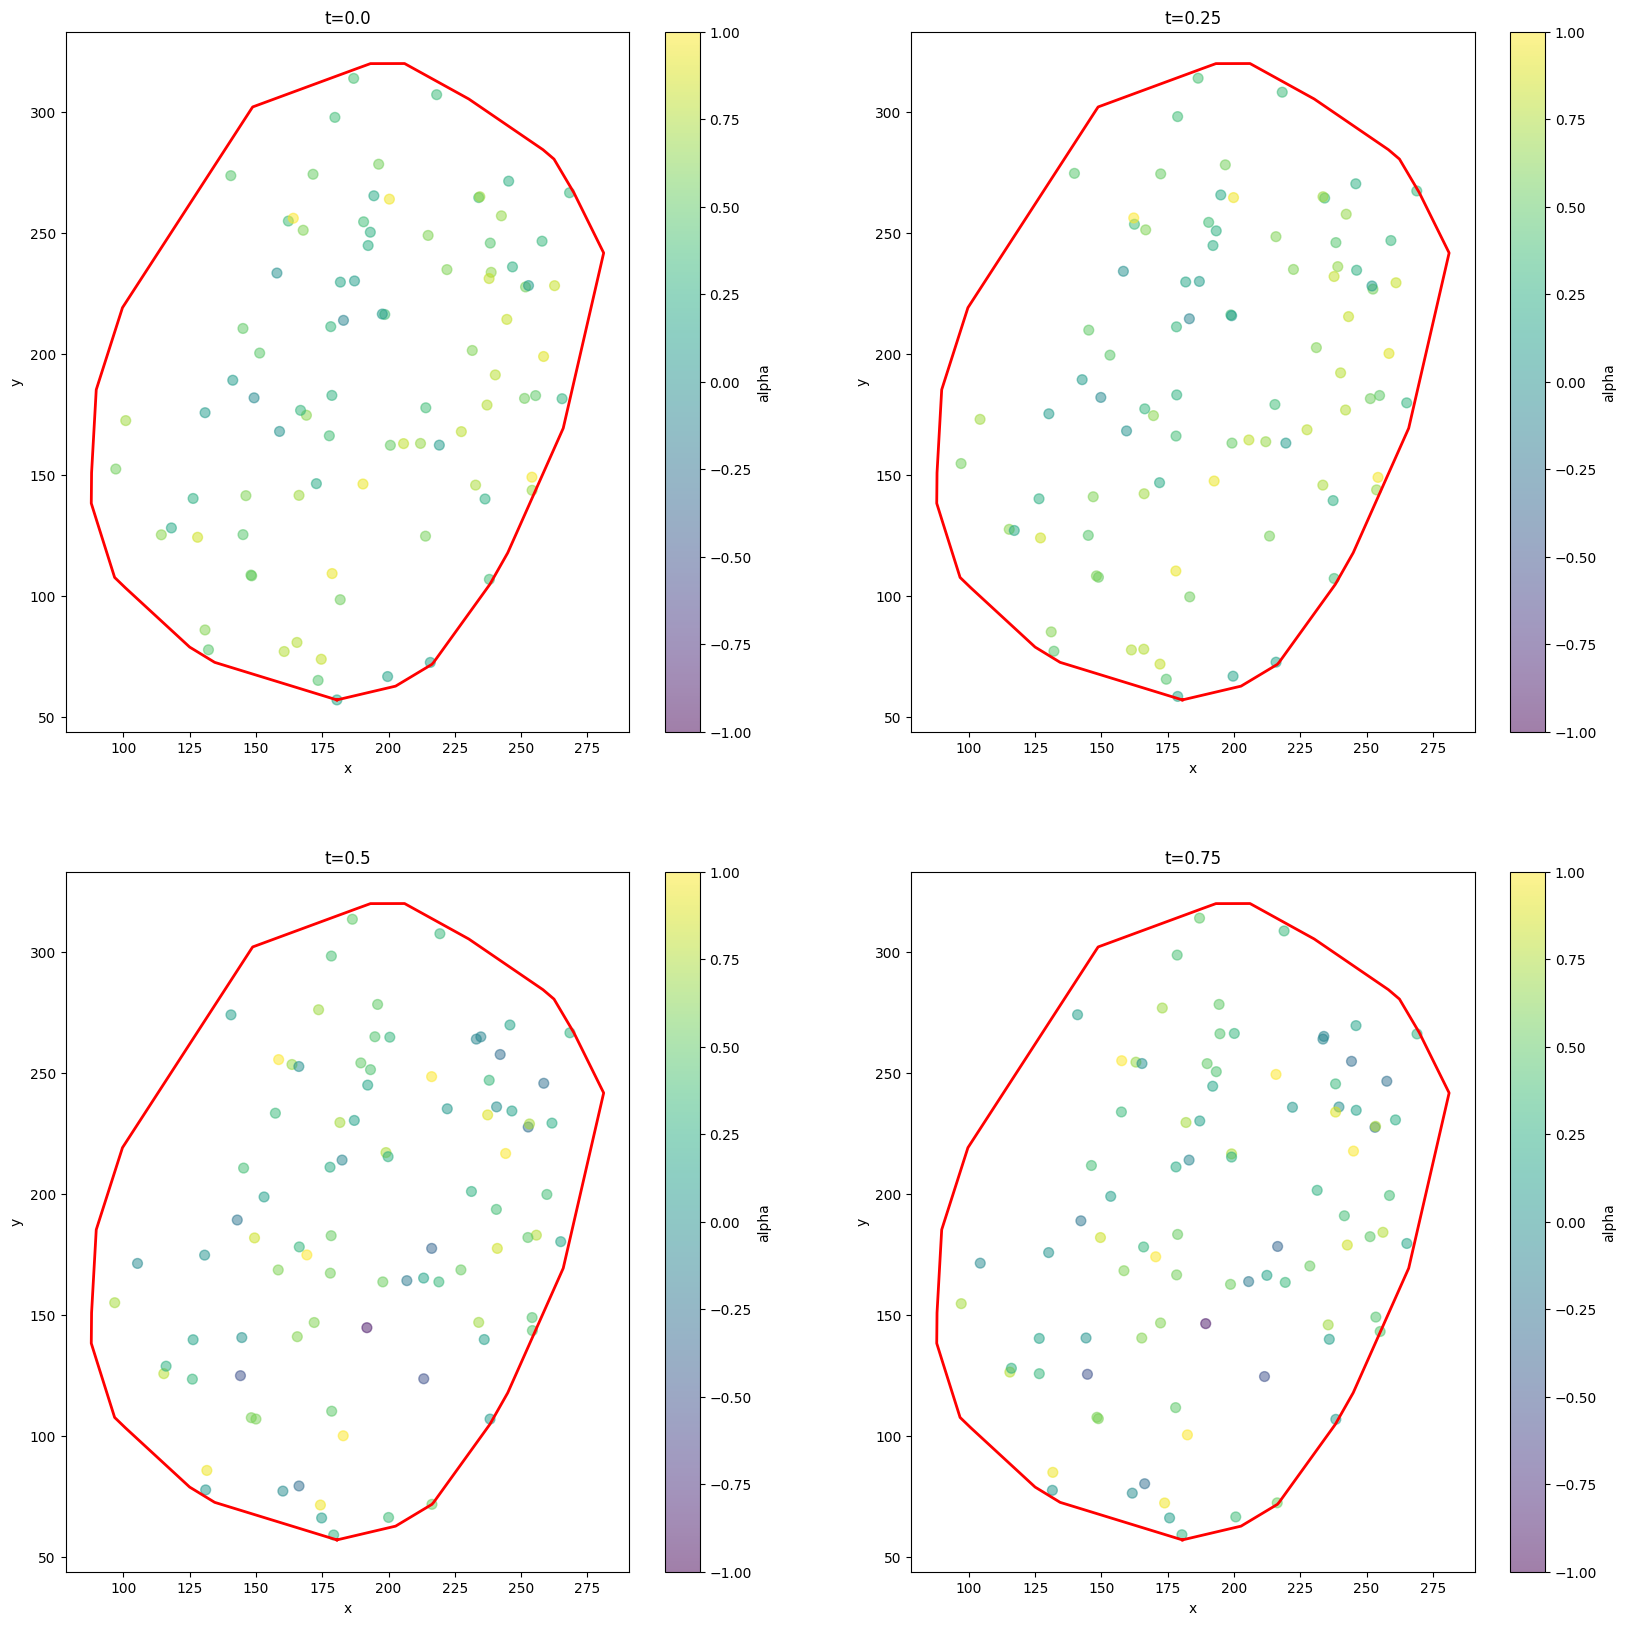

MovieWriter ffmpeg unavailable; using Pillow instead.


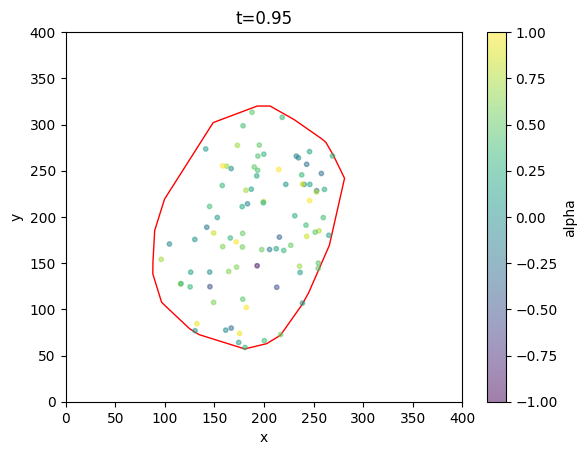

In [185]:
# Resampling
plt.figure(figsize=(20,20))

plt.subplot(2, 2, 1)
# samples = model.sample(10000, t=0).data
# select the first entry in every cutoff entries
curdata1 = datapoints[0:90, :]
plt.plot(cell_coords_closed[:,0], cell_coords_closed[:,1], color='red', linestyle='-', linewidth=2)
plot_data(curdata1, isColor=True, color="black", alpha=0.5, size=50)
# plt.xlim((0,400))
# plt.ylim((0,400))
plt.title("t=0.0")

plt.subplot(2, 2, 2)
# samples = model.sample(10000, t=0.25).data
curdata2 = datapoints[5*89:6*89+1, :]
plt.plot(cell_coords_closed[:,0], cell_coords_closed[:,1], color='red', linestyle='-', linewidth=2)
plot_data(curdata2, isColor=True, color="black", alpha=0.5, size=50)
# plt.grid()
# plt.xlim((0,300))
# plt.ylim((0,350))
plt.title("t=0.25")

plt.subplot(2, 2, 3)
# samples = model.sample(10000, t=0.5).data
curdata3 = datapoints[10*89:11*89+1, :]
plt.plot(cell_coords_closed[:,0], cell_coords_closed[:,1], color='red', linestyle='-', linewidth=2)
plot_data(curdata3, isColor=True, color="black", alpha=0.5, size=50)
# plt.xlim((0,400))
# plt.ylim((0,400))
plt.title("t=0.5")

plt.subplot(2, 2, 4)
# samples = model.sample(10000, t=0.75).data
curdata4 = datapoints[15*89:16*89+1, :]
plt.plot(cell_coords_closed[:,0], cell_coords_closed[:,1], color='red', linestyle='-', linewidth=2)
plot_data(curdata4, isColor=True, color="black", alpha=0.5, size=50)
# plt.xlim((0,400))
# plt.ylim((0,400))
plt.title("t=0.75")
plt.show()

# show a gif of the distribution over time using FuncAnimation
fig, ax = plt.subplots()
ax.set_xlim((0, 400))
ax.set_ylim((0, 400))
polygon = plt.Polygon(cell_coords_closed, closed=True, fill=None, edgecolor='r')
ax.add_patch(polygon)
sc = plt.scatter([], [], s=10, c=[], cmap=myCmap, alpha=0.5, norm=cmap_norm)
plt.colorbar(sc, label='alpha')
plt.xlabel('x')
plt.ylabel('y')

def update(frame):
    # samples = model.sample(5000, t=frame).data
    samples = datapoints[int(frame*20*89):int((frame+0.05)*20*89), 0:3]
    # print(samples.shape)
    sc.set_offsets(samples)
    sc.set_array(samples[:,2])
    # set title
    ax.set_title(f't={frame:.2f}')
    return sc,
ani = FuncAnimation(fig, update, frames=np.linspace(0, 1, 21)[:-1], blit=True)
ani.save('2D_org_data.gif', fps=3)
# plt.show()

In [186]:
# load the model
model = torch.load('2Duni.pth')
# model.eval()

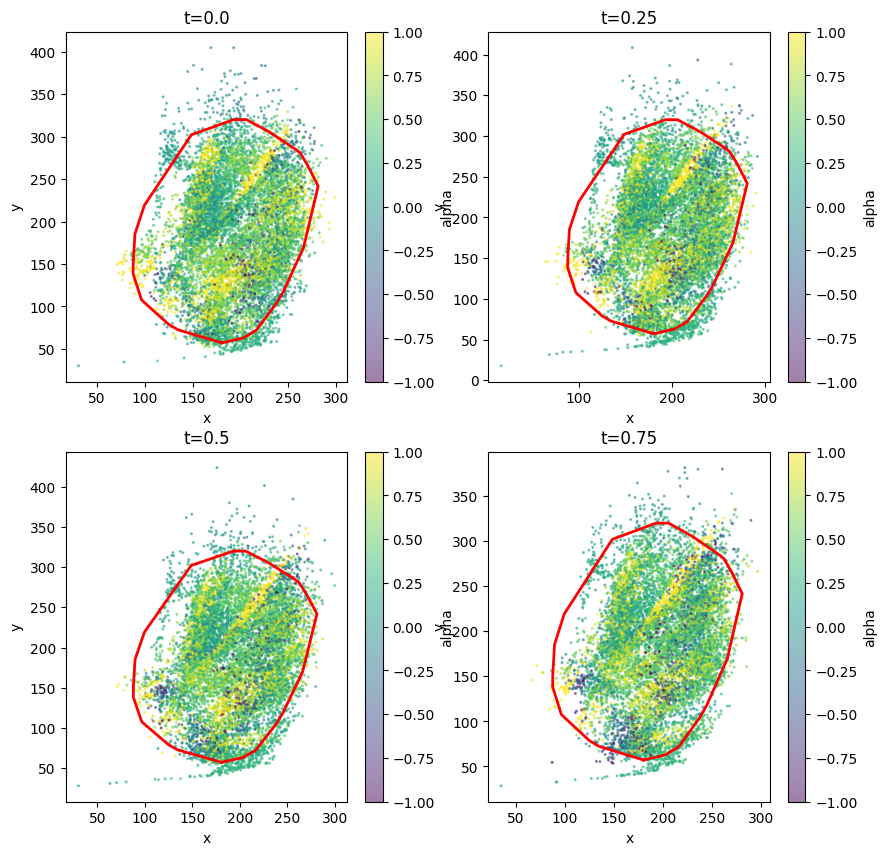

In [187]:
# Resampling
plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
samples = model.sample(10000, t=0).data
plt.plot(cell_coords_closed[:,0], cell_coords_closed[:,1], color='red', linestyle='-', linewidth=2)
plot_data(samples, isColor=True, color="black", alpha=0.5)
# plt.xlim((0,400))
# plt.ylim((0,400))
plt.title("t=0.0")

plt.subplot(2, 2, 2)
samples = model.sample(10000, t=0.25).data
plt.plot(cell_coords_closed[:,0], cell_coords_closed[:,1], color='red', linestyle='-', linewidth=2)
plot_data(samples, isColor=True, color="black", alpha=0.5)
# plt.xlim((0,400))
# plt.ylim((0,400))
plt.title("t=0.25")

plt.subplot(2, 2, 3)
samples = model.sample(10000, t=0.5).data
plt.plot(cell_coords_closed[:,0], cell_coords_closed[:,1], color='red', linestyle='-', linewidth=2)
plot_data(samples, isColor=True, color="black", alpha=0.5)
# plt.xlim((0,400))
# plt.ylim((0,400))
plt.title("t=0.5")

plt.subplot(2, 2, 4)
samples = model.sample(10000, t=0.75).data
plt.plot(cell_coords_closed[:,0], cell_coords_closed[:,1], color='red', linestyle='-', linewidth=2)
plot_data(samples, isColor=True, color="black", alpha=0.5)
# plt.xlim((0,400))
# plt.ylim((0,400))
plt.title("t=0.75")
plt.show()


In [188]:
# generate 1000 random walks using 3D normal distribution with 20 steps each

# parameters
numRandWalks = 50
numSteps = 20
numDims = 3
stepSize = 0.1
mean = np.zeros(numDims)
cov = np.eye(numDims)

[-0.03648842 -0.09392792  0.82465306]
[-0.88517527  1.32435835  1.22234502]
[-0.18507099  0.93637483  0.46636032]
[ 0.70137523  1.90838131 -1.26972741]
[ 0.72256695 -0.67950865  0.62935781]
[-0.70157157  0.03933372  0.15204509]
[-0.02066598 -0.41038774  0.00592144]
[-0.627623    0.77204642  0.93757562]
[-0.07897352  1.03096555  0.63847117]
[-0.69199098  2.63572909  1.34935326]
[0.06480353 0.87430867 0.99930414]
[ 0.0804521  -1.58096324  0.747698  ]
[-0.8311699   0.7884133  -0.70122305]
[-0.2138362   1.37801781 -1.5592587 ]
[ 0.34990541 -0.1664017  -1.26043669]
[1.00508692 0.57059143 1.28689757]
[-0.02578106 -0.76708013 -1.27852725]
[0.06690623 0.56341537 1.07461559]
[ 0.65402451  0.32852347 -1.0166424 ]
[ 0.42535731 -1.51700053  0.31957845]
[-0.65554229 -0.83832958 -0.53851671]
[-0.86296043  0.09142239 -0.69162911]
[0.95763549 1.93173271 0.98409241]
[ 0.52224272 -0.07541032 -0.74311426]
[ 0.16448112 -1.59374687 -0.80642887]
[-0.17588711  0.4873245  -0.91085516]
[-0.96402302  0.6967133 

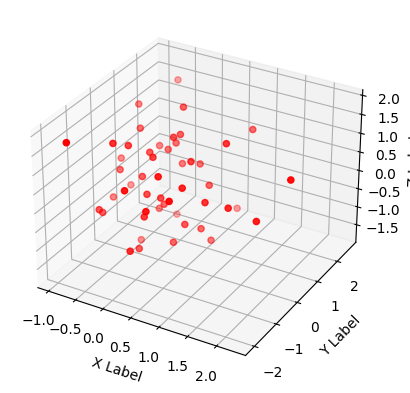

In [189]:
startingPoints = np.random.multivariate_normal(mean, cov, numRandWalks)
for point in startingPoints:
    print(point)

# plot the starting points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(startingPoints[:,0], startingPoints[:,1], startingPoints[:,2], c='r', marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()